In [2]:
! git clone https://github.com/wbasener/UPWINS_Spectral_Library

fatal: destination path 'UPWINS_Spectral_Library' already exists and is not an empty directory.


In [4]:
import spectral
import spectral.io.envi as envi
from matplotlib import pyplot as plt
import os
import sys

# Set current working directory to location of the notbook
os.chdir(sys.path[0])

# Read the spectral library using the spectral package
lib = envi.open('UPWINS_Spectral_Library/UPWINS_4_16_2024.hdr')

In [ ]:
# create a function to search spectra names for a stringmatch and return indices for matches
def name_search(lib, str):
    return [lib.names.index(name) for name in lib.names if name.startswith(str)]

Plot a single spectrum

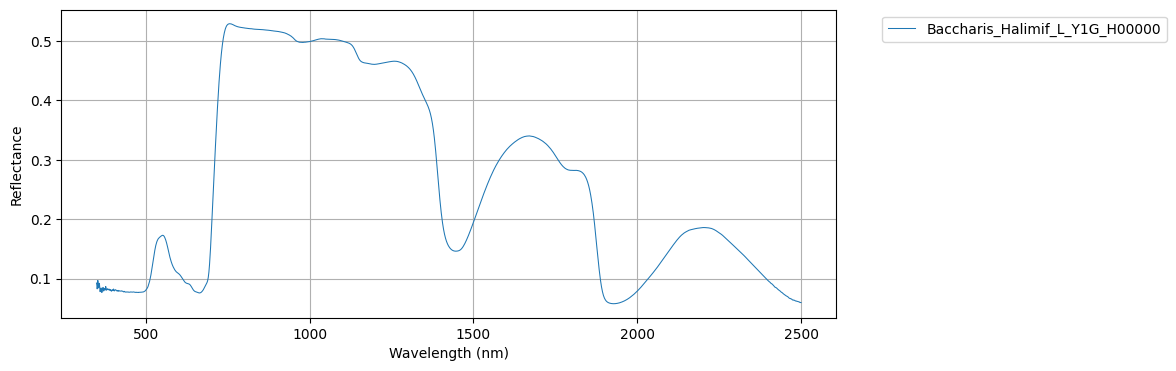

In [5]:
# Plot the first spectrum
plt.figure(figsize=(10,4))
plt.plot(lib.bands.centers, lib.spectra[0], label=lib.names[0], linewidth=0.75)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.grid(True)
plt.title('Reflectance Spectra for a Baccharis_Halimif Leaf')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

Plot all spectra whose name is a given species (Baccharis_Halimif) and plant part (L = leaf)

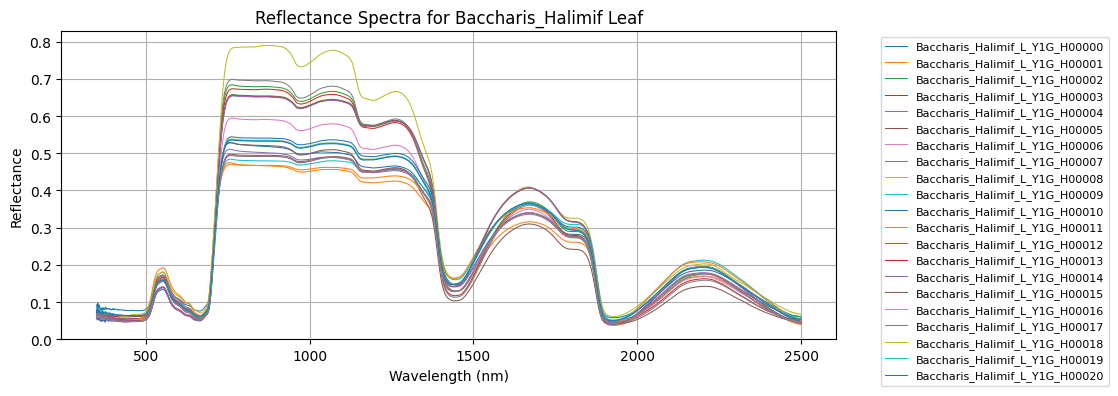

In [12]:
# get indices for spectra whose name starts with 'Baccharis_Halimif_L'
indices = name_search(lib, 'Baccharis_Halimif_L')

# Plot the first spectrum
plt.figure(figsize=(10,4))
for i in indices:
    plt.plot(lib.bands.centers, lib.spectra[i], label=lib.names[i], linewidth=0.75)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Reflectance Spectra for Baccharis_Halimif Leaf')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=8);

Plot spectra for threee species

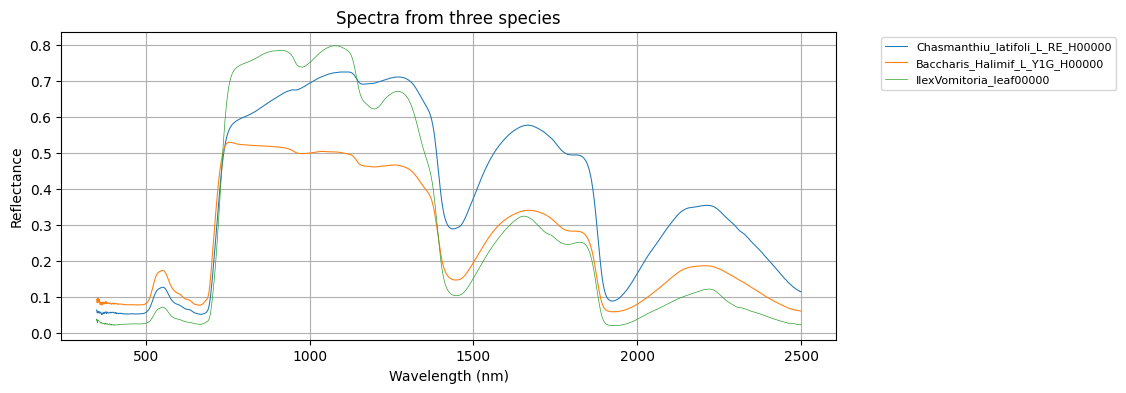

In [9]:
# get indices for spectra whose name starts with 'Chasmanthiu_latifoli_L'
indices_Chas = name_search(lib, 'Chasmanthiu_latifoli_L')
# get indices for spectra whose name starts with 'Baccharis_Halimif_L'
indices_Bacc = name_search(lib, 'Baccharis_Halimif_L')
# get indices for spectra whose name starts with 'IlexVomitoria_leaf'
indices_Ilex = name_search(lib, 'IlexVomitoria_leaf')

# Plot the spectra
plt.figure(figsize=(10,4))
plt.plot(lib.bands.centers, lib.spectra[indices_Chas[0]], label=lib.names[indices_Chas[0]], linewidth=0.75)
plt.plot(lib.bands.centers, lib.spectra[indices_Bacc[0]], label=lib.names[indices_Bacc[0]], linewidth=0.775)
plt.plot(lib.bands.centers, lib.spectra[indices_Ilex[0]], label=lib.names[indices_Ilex[0]], linewidth=0.5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Spectra from three species')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=8);